<h2 style = "color:Green"><center>CHURN MODELLING</center></h2>
<h3 style = "color:Blue"><left><i>EXPLORATORY DATA ANALYSIS<i></left></h3>

___VENKATESH MUNGI___ venkateshmungi1247@gmail.com

In [1]:
# Importing Required Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Loading Dataset

cm = pd.read_csv("C:\PYTHON\PANDAS\Churn_Modelling.csv")
cm.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
# Copying Dataset
cm1 = cm.copy()
cm1.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
# Knowing Shape of the dataset
cm1.shape

(10000, 14)

In [5]:
# Getting metadata information of the dataset
cm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- From the above information it is clear that the data set has 3 categorical columns: Surname, Geography, Gender.

- Other 11 are numeric columns

In [6]:
# To know the statistics of the Dataset
cm1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Knowing the Labels of given Dataset
cm1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# Dropping / deleting Unwanted Columns : 'RowNumber', 'CustomerId','Surname'
cm1.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [9]:
cm1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [10]:
# To konw the 
cm1.shape

(10000, 11)

In [11]:
# Finding Null / Missing Values
cm1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# To Know the unique value of categorical data of feature "Geography"
cm1["Geography"].nunique()

3

- The Geography Coumn contains only three categories.

In [13]:
# To Know the categories of feature "Geography"
cm1[["Geography"]].groupby(["Geography"]).count()

""
Geography
France
Germany
Spain


- From above information we can conclude that we have Three categories in "Geography" i.e, France, Germany, Spain

In [14]:
# To Know the value count of categorical data of feature "Geography"
cm1.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

- From the above information it is clear that France has 5014 values, Germany has 2509 Values, and Spain has 2477 values in a given 10000 values

In [15]:
# To Know the unique value of categorical data of feature "Gender"
cm1["Gender"].nunique()

2

- The Gender has only two categories

In [16]:
cm1[["Gender"]].groupby(["Gender"]).count()

""
Gender
Female
Male


- From above information we can conclude that we have Two categories in "Gender" i.e, Male, Female

In [17]:
cm1.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

- From the above information it is clear that Male has 5457 Value count and Female has 4543 value s in given 10000 values.

- And also it is Confirm that: Male, Female proportions are in balance.

###### HANDLING MISSING AND NULL VALUES

In [18]:
# Checking for Null Values
cm1.isnull().values.any()

False

In [19]:
cm1.isnull().sum().sum()

0

- From the above information it is clear that the dataset has no null values at all.

###### Checking how Gender and Geography Related to Customer Churn 

In [20]:
cm1[["Geography","Gender","Exited"]].groupby(["Geography","Gender"]).agg(["mean","count"])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

- From the above information it is clear that "Females" are morelikely to "exit" than males.

- The Exit (Churn) rate in germany is higher than France and Spain

###### Let us check the Distribution relation between 'Balancce' and 'Estimated Salary'

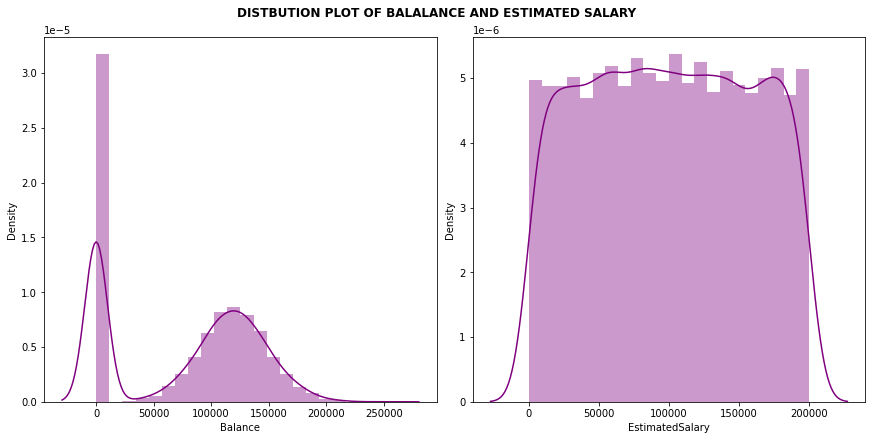

In [21]:
import warnings 
warnings.filterwarnings("ignore")

ax = plt.figure(figsize = (12,6), layout='constrained')
ax = plt.suptitle("DISTBUTION PLOT OF BALALANCE AND ESTIMATED SALARY", fontsize = 12, weight = 'extra bold')
ax = plt.subplot(1,2,1)
ax = sns.distplot(cm1["Balance"],color='purple')
ax = plt.subplot(1,2,2)
ax = sns.distplot(cm1["EstimatedSalary"], color='purple')
ax = plt.show()

- Most of the customers have zero balance. For the remaining customers, the “Balance” has a normal distribution. The “EstimatedSalary” seems to have a uniform distribution.

- Since there are lots of customers with zero balance, We may create a new binary feature indicating whether a customer has zero balance.

In [22]:
cm1['Balance_binary'] = cm1['Balance'].where(cm1['Balance'] == 0, 1)
cm1['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

- Approximately one-third of customers have zero balance. Let’s see the effect of having zero balance on churning.

In [23]:
cm1[['Balance_binary','Exited']].groupby('Balance_binary').mean()

,Exited
Balance_binary,
0.0,0.138236
1.0,0.240796


- Above information indicates that : Customers with zero balance are less likely to churn

###### Checking Correlation among variables

- By checkin the correlation we are trying to find how similarly two random variables deviate from their mean

<AxesSubplot:>

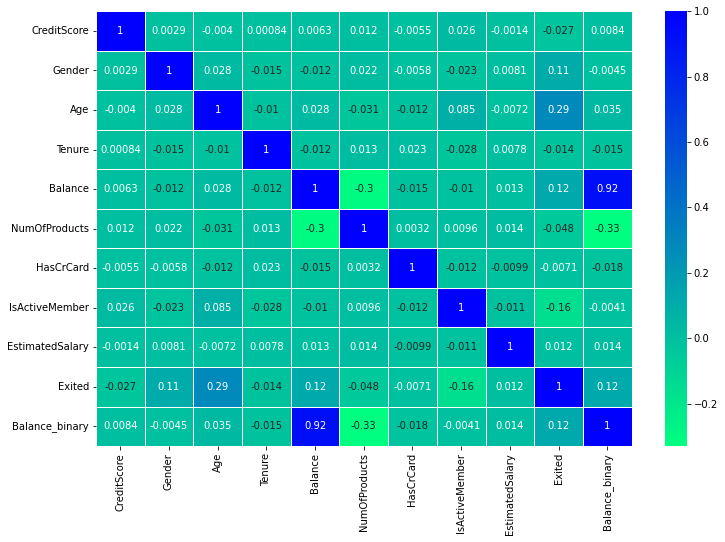

In [24]:
cm1["Gender"].replace({"Male": 0, "Female": 1}, inplace = True)
corr = cm1.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='winter_r', annot=True, linewidths= 1.0)

- From the above information, The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.

- If we compare “Balance” and “Balance_binary”, you will notice a very strong positive correlation since we created one based on the other.

- Since “Age” turns out to have the highest correlation values.

In [25]:
# Finding the average age of churned customer

cm1[['Exited','Age']].groupby(["Exited"]).mean()

,Age
Exited,
0,37.408389
1,44.837997


- From the above information it is confirmed that the average age of the Churned customer is high

###### Encoding the Categorical Data

In [26]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
cm1["Geography"] = encoder.fit_transform(cm1["Geography"])
print(cm1.head(5))

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          0       1   42       8  159660.80              3   
3          699          0       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Balance_binary  
0          1               1        101348.88       1             0.0  
1          0               1        112542.58       0             1.0  
2          1               0        113931.57       1             1.0  
3          0               0         93826.63       0             0.0  
4          1               1         79084.10       0             1.0  


In [27]:
cm1["Geography"].unique()

array([0, 2, 1])

In [28]:
cm1["Gender"].unique()

array([1, 0], dtype=int64)

- Already we mapped Gender column, i.e Males with 0 and Females with 1

In [29]:
cm1.pop("Balance_binary")

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
9995    0.0
9996    1.0
9997    0.0
9998    1.0
9999    1.0
Name: Balance_binary, Length: 10000, dtype: float64

In [30]:
cm1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0


###### Finding  and Handlig the Outliers

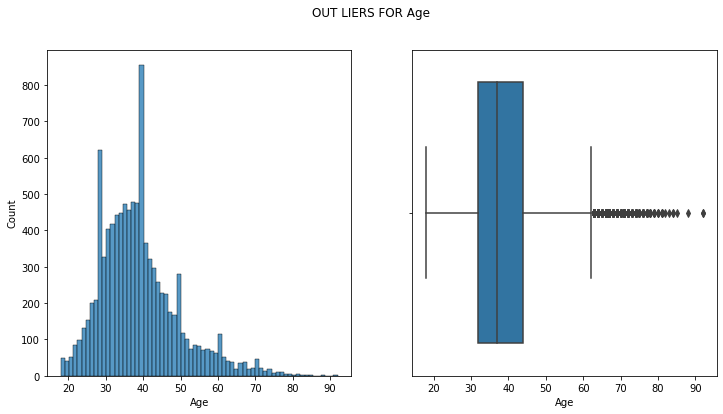

In [31]:
# Ploting Outliers for Feature "Age"
plt.figure(figsize = (12,6))
plt.suptitle("OUT LIERS FOR Age")
plt.subplot(1,2,1)
sns.histplot(data = cm1, x = "Age")
plt.subplot(1,2,2)
sns.boxplot(cm1["Age"])
plt.show()

- From the above Visual it is cclear that "Age" has Outliers at Higher Side.

<AxesSubplot:xlabel='Age', ylabel='Density'>

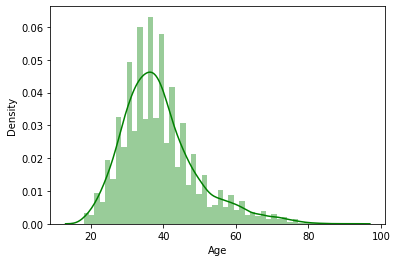

In [32]:
# Checking Distribution Pattern of "Age"

sns.distplot(cm1["Age"], color = "green")

- Distribution of "Age" has Skewness at Right side

In [33]:
from feature_engine.outliers import Winsorizer

In [34]:
win = Winsorizer(capping_method ='gaussian',tail='both',fold=1,variables=["Age"])

In [35]:
cm1["Age"]= win.fit_transform(cm1[["Age"]])

<AxesSubplot:xlabel='Age'>

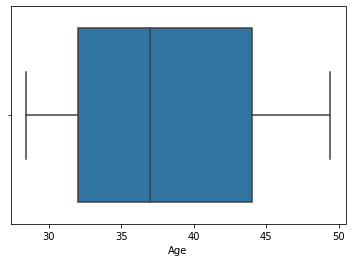

In [36]:
# Rechecking for Outliers

sns.boxplot(cm1["Age"])

- From the above information outliers has removed from feature "Age"

#### Normalisation of the Data

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cm1["CreditScore"] = scaler.fit_transform(np.array(cm1["CreditScore"]).reshape(-1,1))

In [38]:
cm1["Age"] = scaler.fit_transform(np.array(cm1["Age"]).reshape(-1,1))

In [39]:
cm1["Balance"] = scaler.fit_transform(np.array(cm1["Balance"]).reshape(-1,1))

In [40]:
cm1["Tenure"] = scaler.fit_transform(np.array(cm1["Tenure"]).reshape(-1,1))

In [41]:
cm1["EstimatedSalary"] = scaler.fit_transform(np.array(cm1["EstimatedSalary"]).reshape(-1,1))

In [42]:
cm1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,1,0.646751,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2,1,0.599077,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,1,0.646751,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,1,0.503728,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,1,0.694426,0.2,0.500246,1,1,1,0.395400,0


<AxesSubplot:>

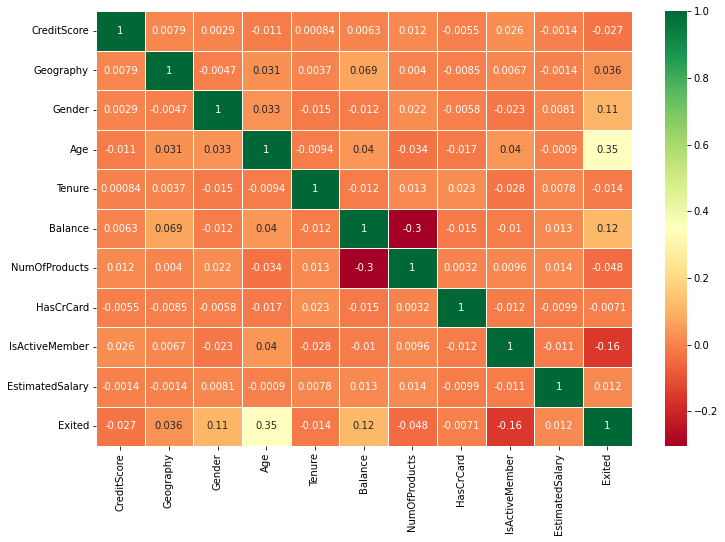

In [43]:
corr = cm1.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='RdYlGn', annot=True, linewidths= 1.0)

###### TRAIN_TEST_SPLIT

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
x = cm1.iloc[:, 0:10]

In [49]:
y = cm1.iloc[:, -1]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0, train_size = .60)

In [59]:
x_train.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7809,0.458,2,0,0.694426,0.2,0.581287,1,1,1,0.992049
5279,0.604,2,1,0.551403,0.7,0.400447,1,1,1,0.622756
3279,0.604,2,0,0.408379,0.7,0.000000,2,1,0,0.343925


In [60]:
x_test.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,0.494,1,1,0.313030,0.8,0.522527,1,1,1,0.964298
898,0.346,0,1,0.551403,0.2,0.410395,1,1,0,0.643514
2398,0.712,2,1,0.646751,0.8,0.380182,1,1,1,0.378640


In [61]:
y_train.count()

6000

In [62]:
y_test.count()

4000

#### Conclusion : 

- In general, females are more likely to “exit” than males. The exit (churn) rate in Germany is higher than in France and Spain.

- Most of the customers have zero balance. For the remaining customers, the “Balance” has a normal distribution. The “EstimatedSalary” seems to have a uniform distribution.

- Approximately one-third of customers have zero balance.

- Customers with zero balance are less likely to churn.

- The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.

- If we compare “Balance” and “Balance_binary”, you will notice a very strong positive correlation since we created one based on the other.

- Since “Age” turns out to have the highest correlation values.

- The average age of churned customers is higher.


***********
There is no limit on exploratory data analysis. Depending on our task or goal, we can approach the data from a different perspective and dig deep to explore.

***********